<a href="https://colab.research.google.com/github/Fadelhamkaa/ML-KNN/blob/main/LP5_Muhammad_Fadel_Hamka_60200122116_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()

# Konversi data menjadi DataFrame
data = pd.DataFrame(digits.data, columns=digits.feature_names)
data['target'] = digits.target

data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [ ]:
# Memisahkan data menjadi fitur (X) dan target (y)
X = data.drop(columns='target')  # Fitur (semua kolom kecuali target)
y = data['target']  # Target (kolom 'target')

# Membagi data menjadi data latih (training) dan data uji (testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

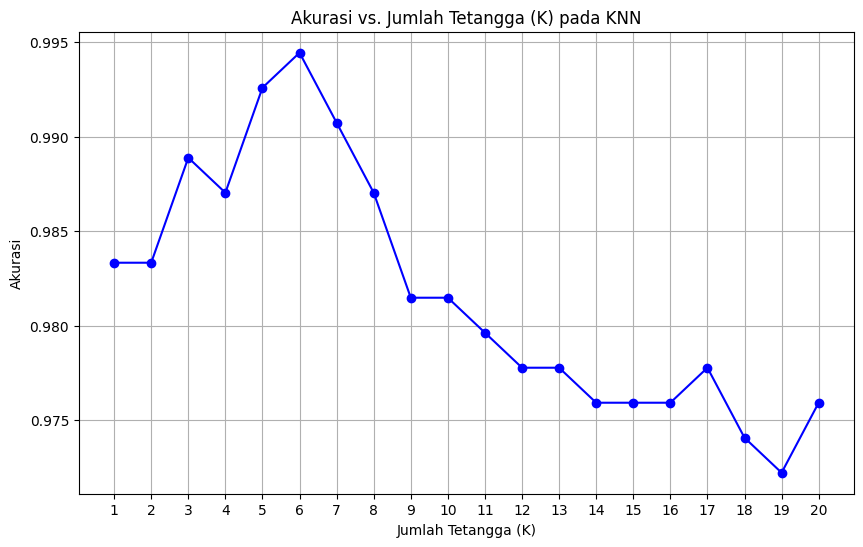

In [ ]:
# Menyimpan akurasi untuk setiap nilai K
k_values = list(range(1, 21))  # K dari 1 hingga 20
accuracy_results = []

# Melakukan percobaan untuk setiap nilai K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append(accuracy)

# Visualisasi akurasi untuk setiap nilai K
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_results, marker='o', color='b', linestyle='-', markersize=6)
plt.title("Akurasi vs. Jumlah Tetangga (K) pada KNN")
plt.xlabel("Jumlah Tetangga (K)")
plt.ylabel("Akurasi")
plt.grid(True)
plt.xticks(k_values)  # Menampilkan label K pada sumbu x
plt.show()

# ***2. a. Classification Report***

In [ ]:
# Tentukan nilai K terbaik dan terburuk
best_k = 6  # Gantilah dengan nilai K terbaik dari hasil eksperimen
worst_k = 19  # Gantilah dengan nilai K terburuk dari hasil eksperimen

# Mengimpor modul yang diperlukan
from sklearn.metrics import classification_report

# Mengimplementasikan model dengan K terbaik
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

# Mengimplementasikan model dengan K terburuk
knn_worst = KNeighborsClassifier(n_neighbors=worst_k)
knn_worst.fit(X_train, y_train)
y_pred_worst = knn_worst.predict(X_test)

# Laporan klasifikasi untuk K terbaik
print("Laporan Klasifikasi untuk K Terbaik:")
print(classification_report(y_test, y_pred_best))

# Laporan klasifikasi untuk K terburuk
print("Laporan Klasifikasi untuk K Terburuk:")
print(classification_report(y_test, y_pred_worst))

Laporan Klasifikasi untuk K Terbaik:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       0.98      1.00      0.99        54
           4       0.98      1.00      0.99        60
           5       0.99      1.00      0.99        66
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        55
           8       1.00      1.00      1.00        43
           9       1.00      0.95      0.97        59

    accuracy                           0.99       540
   macro avg       1.00      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

Laporan Klasifikasi untuk K Terburuk:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       0.94      0.98      0.96        50
   

# ***2. b. Confusion Matrix***

Confusion Matrix untuk K Terbaik:


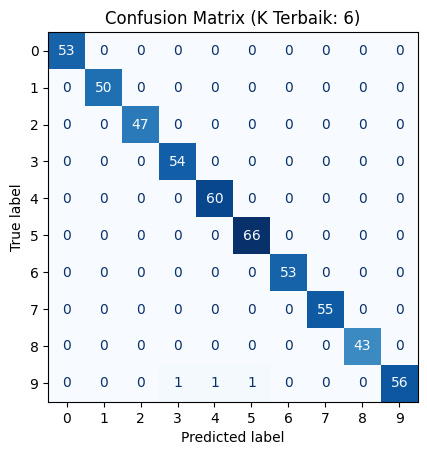

Confusion Matrix untuk K Terburuk:


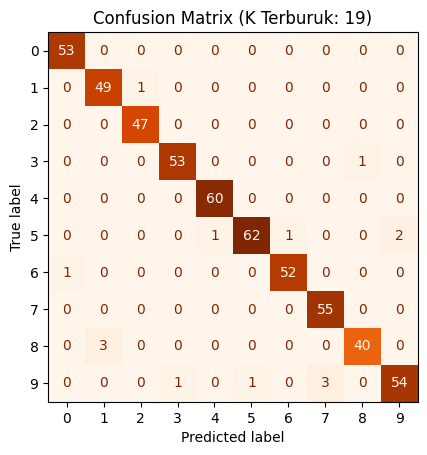

In [ ]:
# ====== Visualisasi Confusion Matrix untuk K Terbaik dan Terburuk ======
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix untuk K terbaik
print("Confusion Matrix untuk K Terbaik:")
disp_best = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best, cmap='Blues', colorbar=False)
plt.title(f"Confusion Matrix (K Terbaik: {best_k})")
plt.show()

# Confusion Matrix untuk K terburuk
print("Confusion Matrix untuk K Terburuk:")
disp_worst = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_worst, cmap='Oranges', colorbar=False)
plt.title(f"Confusion Matrix (K Terburuk: {worst_k})")
plt.show()

# ***2. c. MSE & R2Score***

In [ ]:
# ====== Menghitung dan Menampilkan MSE & R2 Score ======
from sklearn.metrics import mean_squared_error, r2_score

# Menghitung MSE dan R2 Score untuk K terbaik
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# Menghitung MSE dan R2 Score untuk K terburuk
mse_worst = mean_squared_error(y_test, y_pred_worst)
r2_worst = r2_score(y_test, y_pred_worst)

# Menampilkan hasil MSE dan R2 Score
print(f"MSE untuk K Terbaik ({best_k}): {mse_best}")
print(f"R2 Score untuk K Terbaik ({best_k}): {r2_best}")

print(f"MSE untuk K Terburuk ({worst_k}): {mse_worst}")
print(f"R2 Score untuk K Terburuk ({worst_k}): {r2_worst}")

MSE untuk K Terbaik (6): 0.1425925925925926
R2 Score untuk K Terbaik (6): 0.9821591312809899
MSE untuk K Terburuk (19): 0.5685185185185185
R2 Score untuk K Terburuk (19): 0.9288682247177127


3.

# ***3. K Terbaik dengan Perbandingan Jarak yang Berbeda***

In [ ]:
# ====== Kode untuk Nomor 4 ======
# Implementasi K terbaik dengan berbagai jarak: Euclidean, Manhattan, Minkowski

# Daftar metrik jarak yang akan digunakan
distances = ['euclidean', 'manhattan', 'minkowski']
results = []  # Untuk menyimpan hasil setiap metrik jarak

# Iterasi untuk setiap metrik jarak
for distance in distances:
    # Menggunakan KNN dengan metrik jarak tertentu
    knn = KNeighborsClassifier(n_neighbors=best_k, metric=distance)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Menghitung akurasi, MSE, dan R2 Score
    acc = knn.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Menyimpan hasil dalam bentuk tuple
    results.append((distance, acc, mse, r2))

# Membuat DataFrame untuk menampilkan hasil
distance_comparison = pd.DataFrame(results, columns=['Metrik Jarak', 'Akurasi', 'MSE', 'R2 Score'])

# Menampilkan hasil dalam bentuk tabel
print(distance_comparison)

  Metrik Jarak   Akurasi       MSE  R2 Score
0    euclidean  0.994444  0.142593  0.982159
1    manhattan  0.981481  0.520370  0.934892
2    minkowski  0.994444  0.142593  0.982159


# **5.**



--------



In [ ]:
# Informasi tentang dataset
print(data.info())  # Untuk informasi tipe data dan jumlah baris
print(data.describe())  # Untuk statistik deskriptif
print(data.head())  # Untuk melihat 5 baris pertama dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

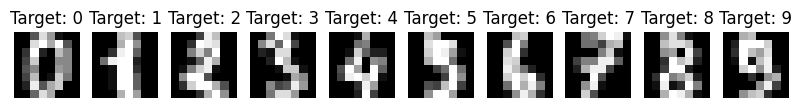

In [ ]:
import matplotlib.pyplot as plt

# Menampilkan beberapa sampel gambar
fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'Target: {digits.target[i]}')
    ax.axis('off')
plt.show()
